In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# My data is in google drive.
train_dir ="/content/drive/MyDrive/Image/Train"
test_dir="/content/drive/MyDrive/Image/Test"

In [ ]:
# function to get count of images
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count 

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir) # For testing i took only few samples from unseen data. we can evaluate using validation data which is part of train data.
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

16 Classes
31032 Train images
1214 Test images


In [ ]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, # validation split 20%.
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# set height and width and color of input image.
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 31032 images belonging to 16 classes.
Found 1214 images belonging to 16 classes.


In [ ]:
# The name of the 12 diseases.
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 4,
 'Corn_(maize)___Common_rust_': 5,
 'Corn_(maize)___Northern_Leaf_Blight': 6,
 'Corn_(maize)___healthy': 7,
 'Tomato___Bacterial_spot': 8,
 'Tomato___Early_blight': 9,
 'Tomato___Late_blight': 10,
 'Tomato___healthy': 11,
 'diseased cotton leaf': 12,
 'diseased cotton plant': 13,
 'fresh cotton leaf': 14,
 'fresh cotton plant': 15}

In [ ]:
# CNN building.
model = Sequential()
model.add(Conv2D(32, (5, 5),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))          
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 82, 82, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 41, 41, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [ ]:
model_layers = [ layer.name for layer in model.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d', 'max_pooling2d', 'conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'flatten', 'dense', 'dropout', 'dense_1', 'dense_2']


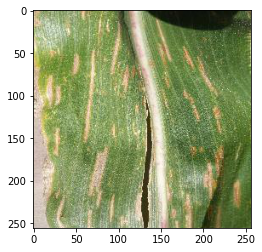

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/Image/Train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/0657e6c0-5a6d-4ef3-807a-4e31e57fb683___RS_GLSp 7344 copy_FlipTB.jpg')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/MyDrive/Image/Train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/0657e6c0-5a6d-4ef3-807a-4e31e57fb683___RS_GLSp 7344 copy_FlipTB.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
# Visualizing output after every layer.
from keras.models import Model
conv2d_1_output = Model(inputs=model.input, outputs=model.get_layer('conv2d_1').output)
max_pooling2d_1_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_1').output)
conv2d_2_output = Model(inputs=model.input,outputs=model.get_layer('conv2d_2').output)
max_pooling2d_2_output = Model(inputs=model.input,outputs=model.get_layer('max_pooling2d_2').output)
flatten_1_output = Model(inputs=model.input,outputs=model.get_layer('flatten').output)
conv2d_1_features = conv2d_1_output.predict(img)
max_pooling2d_1_features = max_pooling2d_1_output.predict(img)
conv2d_2_features = conv2d_2_output.predict(img)
max_pooling2d_2_features = max_pooling2d_2_output.predict(img)
flatten_1_features = flatten_1_output.predict(img)

1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 99ms/step


In [ ]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 31032 images belonging to 16 classes.


In [ ]:
from tensorflow import keras
import tensorflow as tf 
opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit_generator(train_generator,
                          epochs=4,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples// batch_size,verbose=1)

Epoch 1/4
969/969 [==============================] - 9633s 10s/step - loss: 0.7861 - accuracy: 0.7248 - val_loss: 0.4005 - val_accuracy: 0.8493
Epoch 2/4
969/969 [==============================] - 3979s 4s/step - loss: 0.3685 - accuracy: 0.8660 - val_loss: 0.2131 - val_accuracy: 0.9243
Epoch 3/4
969/969 [==============================] - 3983s 4s/step - loss: 0.2702 - accuracy: 0.9040 - val_loss: 0.2004 - val_accuracy: 0.9239
Epoch 4/4
969/969 [==============================] - 4005s 4s/step - loss: 0.2229 - accuracy: 0.9212 - val_loss: 0.1837 - val_accuracy: 0.9344


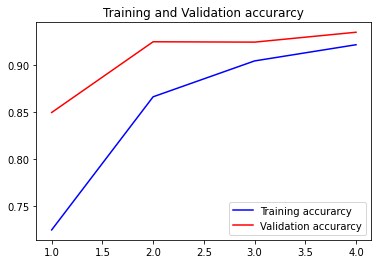

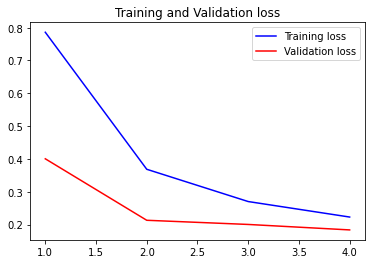

In [ ]:
acc = train.history['accuracy']
val_acc = train.history['val_accuracy']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

38/38 [==============================] - 306s 8s/step - loss: 0.2446 - accuracy: 0.9160
Test score is 0.24457883834838867
Test accuracy is 0.9159802198410034


In [ ]:
# Save entire model with optimizer, architecture, weights and training configuration.
from keras.models import load_model
model.save('crop32000.h5')

In [ ]:
# Save model weights.
from keras.models import load_model
model.save_weights('crop_weights32000.h5')

In [ ]:
# Get classes of model trained on
classes = train_generator.class_indices 
classes

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 4,
 'Corn_(maize)___Common_rust_': 5,
 'Corn_(maize)___Northern_Leaf_Blight': 6,
 'Corn_(maize)___healthy': 7,
 'Tomato___Bacterial_spot': 8,
 'Tomato___Early_blight': 9,
 'Tomato___Late_blight': 10,
 'Tomato___healthy': 11,
 'diseased cotton leaf': 12,
 'diseased cotton plant': 13,
 'fresh cotton leaf': 14,
 'fresh cotton plant': 15}

In [ ]:
# Loading model and predict.
from keras.models import load_model
model=load_model('crop32000.h5')

Classes = ["Apple___Apple_scab","Apple___Black_rot","Apple___Cedar_apple_rust","Apple___healthy","Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot","Corn_(maize)___Common_rust_","Corn_(maize)___Northern_Leaf_Blight","Corn_(maize)___healthy","Tomato___Bacterial_spot","Tomato___Early_blight",
 "Tomato___Late_blight","Tomato___healthy","diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]


1/1 [==============================] - 0s 191ms/step
Tomato___Late_blight


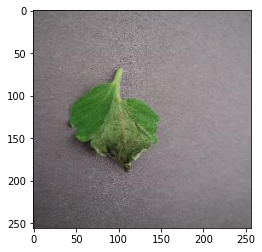

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/content/drive/MyDrive/TRAIN/Tomato___Late_blight/04540250-4926-47a6-9240-e047a04befc5___GHLB2 Leaf 9019.JPG')])
disease=image.load_img('/content/drive/MyDrive/TRAIN/Tomato___Late_blight/04540250-4926-47a6-9240-e047a04befc5___GHLB2 Leaf 9019.JPG')
plt.imshow(disease)
print(Classes[np.argmax(result)])

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('crop32000.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("converted_model.tflite", "wb").write(tflite_model)

47715048

In [1]:
from tensorflow.keras.models import load_model
model=load_model('/content/drive/MyDrive/crop32000.h5')

Classes = ["Apple___Apple_scab","Apple___Black_rot","Apple___Cedar_apple_rust","Apple___healthy","Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot","Corn_(maize)___Common_rust_","Corn_(maize)___Northern_Leaf_Blight","Corn_(maize)___healthy","Tomato___Bacterial_spot","Tomato___Early_blight",
 "Tomato___Late_blight","Tomato___healthy","diseased cotton leaf","diseased cotton plant","fresh cotton leaf","fresh cotton plant"]


1/1 [==============================] - 0s 81ms/step
fresh cotton leaf


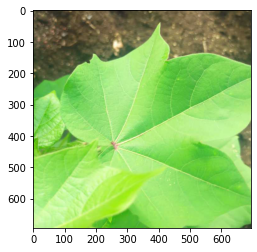

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Pre-Processing test data same as train data.
img_width=256
img_height=256
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

from tensorflow.keras.preprocessing import image

def prepare(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return np.expand_dims(x, axis=0)
    
    
result = model.predict([prepare('/content/drive/MyDrive/Image/Train/fresh cotton leaf/d (127)_iaip.jpg')])
disease=image.load_img('/content/drive/MyDrive/Image/Train/fresh cotton leaf/d (127)_iaip.jpg')
plt.imshow(disease)
print(Classes[np.argmax(result)])